# How can we load the dataset from a CSV file into a Pandas DataFrame?

In [3]:
import pandas as pd

In [100]:
df=pd.read_csv("employee_dataset.csv")

# What is the dimension (number of rows and columns) of the dataset? What are the data types of the variables?

In [103]:
df.shape

(100, 10)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employee ID          100 non-null    int64  
 1   First Name           100 non-null    object 
 2   Last Name            100 non-null    object 
 3   Date of Birth        100 non-null    object 
 4   Job Title            100 non-null    object 
 5   Salary               100 non-null    float64
 6   Years of Experience  100 non-null    int64  
 7   Email                100 non-null    object 
 8   Phone Number         100 non-null    object 
 9   Address              100 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


# How can we identify missing values in the dataset and summarize it using describe()?

In [108]:
df.isna()

,Employee ID,First Name,Last Name,Date of Birth,Job Title,Salary,Years of Experience,Email,Phone Number,Address
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


In [110]:
df.describe()

,Employee ID,Salary,Years of Experience
count,100.000000,100.00000,100.000000
mean,5417.180000,72181.11240,10.730000
std,2497.933216,23863.99174,7.937706
min,1049.000000,31401.26000,0.000000
25%,3333.500000,51791.82000,5.000000
50%,5021.000000,73168.52000,9.000000
75%,7526.000000,90129.34000,15.000000
max,9958.000000,119885.40000,36.000000


# Are there any missing values in the dataset? How can we handle them using Pandas?

There are no null values in the dataset. If null values are present then we can handle them using forward fill and backward fill.

In [114]:
print(df.isnull().sum())

Employee ID            0
First Name             0
Last Name              0
Date of Birth          0
Job Title              0
Salary                 0
Years of Experience    0
Email                  0
Phone Number           0
Address                0
dtype: int64


# Are there duplicate employee records, and how can we remove them?

In [117]:
duplicates=df.duplicated().sum()

In [119]:
print(duplicates)

0


In [121]:
df.drop_duplicates(inplace=True)

In [123]:
duplicates=df.duplicated().sum()

In [125]:
print(duplicates)

0


# How can we extract the number of years an employee has been with the company?

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
df.columns

Index(['Employee ID', 'First Name', 'Last Name', 'Date of Birth', 'Job Title',
       'Salary', 'Years of Experience', 'Email', 'Phone Number', 'Address'],
      dtype='object')

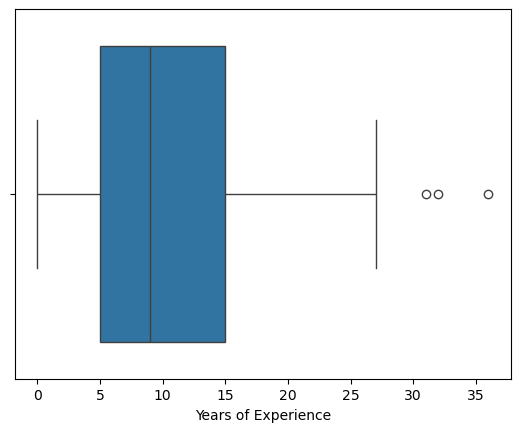

In [154]:
sns.boxplot(x=df['Years of Experience'])
plt.show()

# How can we convert incorrect data types (e.g., date columns to datetime, categorical columns to category)?

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%Y', errors='coerce')

In [143]:
df['Job Title'] = df['Job Title'].astype('category')

# Are there any outliers in the salary column, and how can we handle them?

In [148]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR)))]

In [152]:
print(IQR)

38337.52
